<a href="https://colab.research.google.com/github/Ujoshna/OIBSIP/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1000 non-null   int64  
 1   purchase_frequency      1000 non-null   int64  
 2   recency                 1000 non-null   int64  
 3   average_purchase_value  1000 non-null   float64
 4   Age                     1000 non-null   int64  
 5   Gender                  1000 non-null   object 
 6   Item Purchased          1000 non-null   object 
 7   Category                1000 non-null   object 
 8   Purchase Amount (USD)   1000 non-null   float64
 9   Location                1000 non-null   object 
 10  Size                    1000 non-null   object 
 11  Color                   1000 non-null   object 
 12  Season                  1000 non-null   object 
 13  Review Rating           1000 non-null   float64
 14  Subscription Status     1000 non-null   o

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


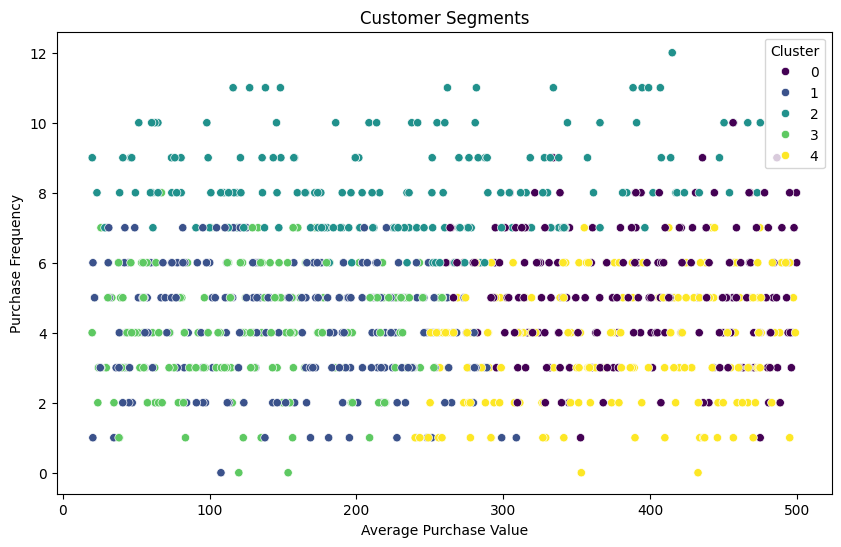

{0: 'Target high-value customers with premium offers.',
 1: 'Increase engagement with frequent buyers through loyalty programs.',
 2: 'Encourage recent buyers with timely promotions.',
 3: 'Win back lapsed customers with special discounts.',
 4: 'Retain new customers by enhancing their initial shopping experience.'}

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/customer_segmentation_extended_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()
# Display basic information about the dataset
data.info()

# Check for missing values
missing_values = data.isnull().sum()

# Handle missing values (if any)
data = data.dropna()  # Here, we simply drop rows with missing values

# Summary statistics
summary_stats = data.describe()

# Display the cleaned dataset
data.head()
# Calculate average purchase value
average_purchase_value = data['Purchase Amount (USD)'].mean()

# Calculate frequency of purchases
purchase_frequency = data['customer_id'].value_counts().mean()

# Calculate total spending per customer
total_spending = data.groupby('customer_id')['Purchase Amount (USD)'].sum()

# Display key metrics
average_purchase_value, purchase_frequency, total_spending.head()
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = '/content/customer_segmentation_extended_dataset.csv'
data = pd.read_csv(file_path)

# ... (rest of your code up to handling missing values)

# Handle missing values (if any)
# Instead of dropping all rows with missing values, consider filling them
# with a suitable strategy like mean, median or a constant value.
data['Purchase Amount (USD)'].fillna(data['Purchase Amount (USD)'].mean(), inplace=True)
# Apply a similar strategy for other columns with missing values as needed.

# ... (rest of your code)

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # This should now work without error

# ... (rest of your clustering code)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['purchase_frequency', 'average_purchase_value', 'recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the clustered data
data.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot for customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_purchase_value', y='purchase_frequency', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Average Purchase Value')
plt.ylabel('Purchase Frequency')
plt.legend(title='Cluster')
plt.show()
# Analyze characteristics of each segment
segment_analysis = data.groupby('Cluster').agg({
    'Previous Purchases': ['mean', 'sum'],
    'purchase_frequency': 'mean',
    'recency': 'mean'
}).reset_index()

# Display segment analysis
segment_analysis

# Provide recommendations based on segment characteristics
recommendations = {
    0: "Target high-value customers with premium offers.",
    1: "Increase engagement with frequent buyers through loyalty programs.",
    2: "Encourage recent buyers with timely promotions.",
    3: "Win back lapsed customers with special discounts.",
    4: "Retain new customers by enhancing their initial shopping experience."
}

recommendations

